In [39]:
from convergence_helpers import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gaussian_mixture_grid import GaussianMixtureGrid
import numpy as np
from figure_grid import *

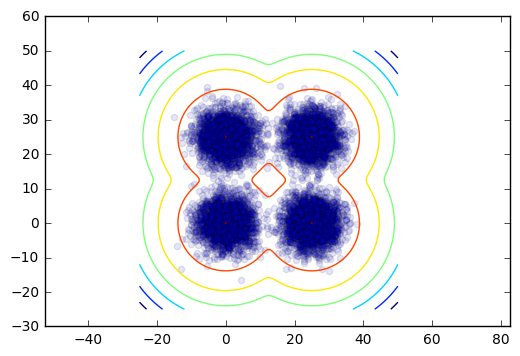

In [7]:
gr2d = GaussianMixtureGrid(2, 2, 25, 4)
s = np.linspace(-25,50,100)
X,Y = np.meshgrid(s,s)
Z = [[gr2d.logp([x,y]) for x in s] for y in s]
plt.contour(X,Y,Z)
plt.scatter(*gr2d.sample(10000).T, alpha=0.1)
plt.axis('equal')
plt.show()

In [8]:
mh_2d_0s = [gr2d.mh_with_teleportation(teleprob=0) for _ in range(8)]

In [12]:
mh_2d_1s = [gr2d.mh_with_teleportation(teleprob=0.1) for _ in range(8)]

In [13]:
mh_2d_2s = [gr2d.mh_with_teleportation(teleprob=0.25) for _ in range(8)]

In [14]:
mh_2d_3s = [gr2d.mh_with_teleportation(teleprob=1.) for _ in range(8)]

In [23]:
mh_2d_4s = [gr2d.mh_with_teleportation(teleprob=0.8) for _ in range(8)]

In [63]:
s0 = joint_conv_trace(mh_2d_0s, gr2d)
s1 = joint_conv_trace(mh_2d_1s, gr2d)
s2 = joint_conv_trace(mh_2d_2s, gr2d)
s3 = joint_conv_trace(mh_2d_3s, gr2d)
s4 = joint_conv_trace(mh_2d_4s, gr2d)

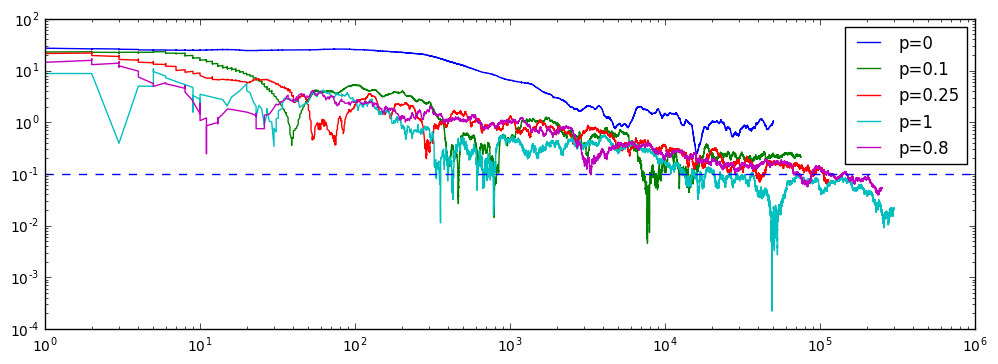

In [71]:
plt.figure(figsize=(12,4))
plt.plot(*s0, label='p=0')
plt.plot(*s1, label='p=0.1')
plt.plot(*s2, label='p=0.25')
plt.plot(*s3, label='p=1')
plt.plot(*s4, label='p=0.8')

plt.yscale('log')
plt.xscale('log')
plt.axhline(0.1, ls='--')
plt.legend(loc='best')
plt.show()

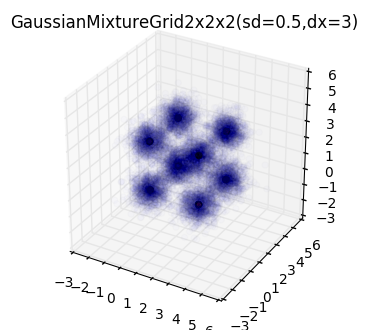

In [30]:
gr3d = GaussianMixtureGrid(2, 3, 3, 0.5)
X, Y, Z = gr3d.sample(10000).T
Xu, Yu, Zu = gr3d.means.T
plt.figure(figsize=(4,4)).add_subplot(111, projection='3d')
plt.title(gr3d.name)
plt.scatter(X, Y, zs=Z, alpha=0.01)
plt.scatter(Xu, Yu, zs=Zu, c='orange')
plt.show()

In [32]:
mh_3d_0s = [gr3d.mh_with_teleportation(teleprob=0, num_samples=100000) for _ in range(8)]
mh_3d_1s = [gr3d.mh_with_teleportation(teleprob=0.1, num_samples=100000) for _ in range(8)]
mh_3d_2s = [gr3d.mh_with_teleportation(teleprob=0.25, num_samples=100000) for _ in range(8)]
mh_3d_3s = [gr3d.mh_with_teleportation(teleprob=0.75, num_samples=100000) for _ in range(8)]
mh_3d_4s = [gr3d.mh_with_teleportation(teleprob=1, num_samples=100000) for _ in range(8)]

In [34]:
t0 = joint_conv_trace(mh_3d_0s, gr3d)
t1 = joint_conv_trace(mh_3d_1s, gr3d)
t2 = joint_conv_trace(mh_3d_2s, gr3d)
t3 = joint_conv_trace(mh_3d_3s, gr3d)
t4 = joint_conv_trace(mh_3d_4s, gr3d)

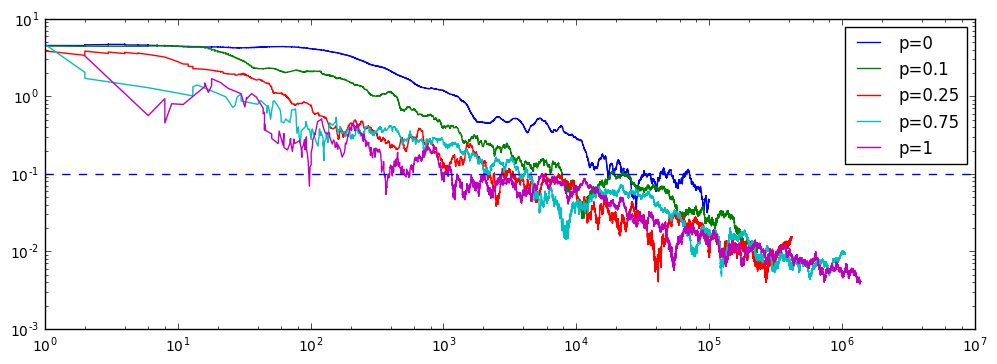

In [72]:
plt.figure(figsize=(12,4))
plt.plot(*t0, label='p=0')
plt.plot(*t1, label='p=0.1')
plt.plot(*t2, label='p=0.25')
plt.plot(*t3, label='p=0.75')
plt.plot(*t4, label='p=1')

plt.yscale('log')
plt.xscale('log')
plt.axhline(0.1, ls='--')
plt.legend(loc='best')
plt.show()

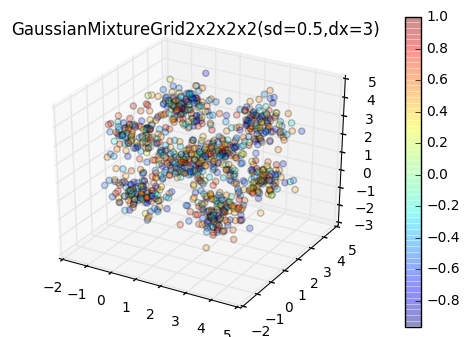

In [61]:
gr4d = GaussianMixtureGrid(2, 4, 3, 0.5)
X, Y, Z, W = gr4d.sample(1000).T
W = W + W.min()
W /= W.max()
plt.figure(figsize=(6,4)).add_subplot(111, projection='3d')
plt.title(gr4d.name)
plt.scatter(X, Y, zs=Z, c=W, alpha=0.25)
plt.colorbar()
plt.show()

In [62]:
mh_4d_0s = [gr4d.mh_with_teleportation(teleprob=0, num_samples=100000) for _ in range(8)]
mh_4d_1s = [gr4d.mh_with_teleportation(teleprob=0.5, num_samples=100000) for _ in range(8)]
mh_4d_2s = [gr4d.mh_with_teleportation(teleprob=1, num_samples=100000) for _ in range(8)]

In [64]:
u0 = joint_conv_trace(mh_4d_0s, gr4d)
u1 = joint_conv_trace(mh_4d_1s, gr4d)
u2 = joint_conv_trace(mh_4d_2s, gr4d)

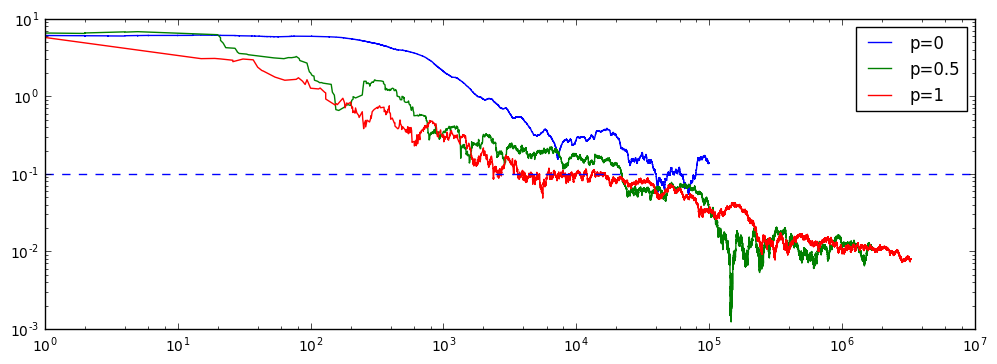

In [67]:
plt.figure(figsize=(12,4))
plt.plot(*u0, label='p=0')
plt.plot(*u1, label='p=0.5')
plt.plot(*u2, label='p=1')

plt.yscale('log')
plt.xscale('log')
plt.axhline(0.1, ls='--')
plt.legend(loc='best')
plt.show()

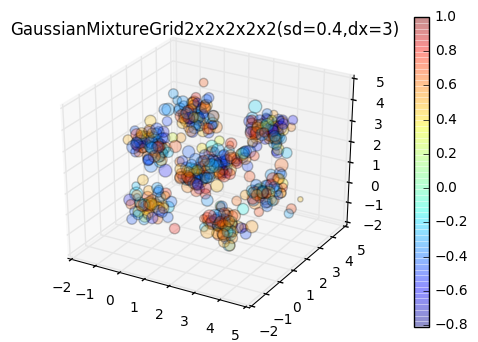

In [79]:
gr5d = GaussianMixtureGrid(2, 5, 3, 0.4)
X, Y, Z, W, W2 = gr5d.sample(1000).T
W = W + W.min(); W /= W.max()
W2 = W2 + W2.min(); W2 /= W2.max(); W2 *= 100

plt.figure(figsize=(6,4)).add_subplot(111, projection='3d')
plt.title(gr5d.name)
plt.scatter(X, Y, zs=Z, c=W, s=W2, alpha=0.25)
plt.colorbar()
plt.show()

In [81]:
mh_5d_0s = [gr5d.mh_with_teleportation(teleprob=0, num_samples=50000) for _ in range(8)]
mh_5d_1s = [gr5d.mh_with_teleportation(teleprob=0.5, num_samples=50000) for _ in range(8)]
mh_5d_2s = [gr5d.mh_with_teleportation(teleprob=1, num_samples=50000) for _ in range(8)]

In [114]:
mh_5d_3s = [gr5d.mh_with_teleportation(teleprob=0.1, num_samples=50000) for _ in range(8)]

In [82]:
v0 = joint_conv_trace(mh_5d_0s, gr5d)
v1 = joint_conv_trace(mh_5d_1s, gr5d)
v2 = joint_conv_trace(mh_5d_2s, gr5d)

In [115]:
v3 = joint_conv_trace(mh_5d_3s, gr5d)

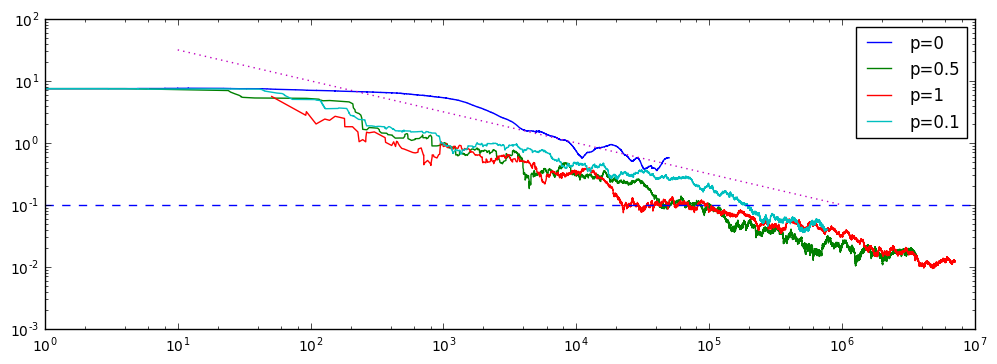

In [120]:
plt.figure(figsize=(12,4))
plt.plot(*v0, label='p=0')
plt.plot(*v1, label='p=0.5')
plt.plot(*v2, label='p=1')
plt.plot(*v3, label='p=0.1')
plt.plot(np.logspace(1,6,100),100./np.sqrt(np.logspace(1,6,100)), ls='dotted')
plt.yscale('log')
plt.xscale('log')
plt.axhline(0.1, ls='--')
plt.legend(loc='best')
plt.show()

In [113]:
len(gr5d.rejection_sample_bounding_box(10000)[0])/10000.

0.0084

In [33]:
def efficiency(mh):
  fail = sum(mh[i] == s for i, s in enumerate(mh[1:]))
  return 1 - fail/float(len(mh))

In [35]:
oneG1 = GaussianMixtureGrid(1, 1, 1, 1)
s1 = oneG1.mh_with_teleportation(teleprob=0)
print(efficiency(s1[0]))
print(len(oneG1.rejection_sample_bounding_box(10000)[0])/10000.)

[ 0.70956]
0.4204


In [31]:
oneG2 = GaussianMixtureGrid(1, 2, 1, 1)
s2 = oneG2.mh_with_teleportation(teleprob=0)
print(efficiency(s2[0]))
print(len(oneG2.rejection_sample_bounding_box(10000)[0])/10000.)

[ 0.55474  0.55474]
0.1661


In [15]:
oneG3 = GaussianMixtureGrid(1, 3, 1, 1)
s3 = oneG3.mh_with_teleportation(teleprob=0, proposal_sd=oneG3.stddev/np.sqrt(2))
print(efficiency(s3[0]))
print(len(oneG3.rejection_sample_bounding_box(10000)[0])/10000.)

[ 0.58238  0.58238  0.58238]
0.0712


In [17]:
oneG4 = GaussianMixtureGrid(1, 4, 1, 1)
s4 = oneG4.mh_with_teleportation(teleprob=0, proposal_sd=oneG4.stddev/np.sqrt(2))
print(efficiency(s4[0]))
print(len(oneG4.rejection_sample_bounding_box(10000)[0])/10000.)

[ 0.51992  0.51992  0.51992  0.51992]
0.0273


In [22]:
oneG5 = GaussianMixtureGrid(1, 5, 1, 1)
s5 = oneG5.mh_with_teleportation(teleprob=0, proposal_sd=oneG5.stddev/np.sqrt(2), num_samples=100000)
print(efficiency(s5[0]))
print(len(oneG5.rejection_sample_bounding_box(10000)[0])/10000.)

[ 0.46377  0.46377  0.46377  0.46377  0.46377]
0.0116


In [24]:
oneG6 = GaussianMixtureGrid(1, 6, 1, 1)
s6 = oneG6.mh_with_teleportation(teleprob=0, proposal_sd=oneG6.stddev/np.sqrt(2), num_samples=100000)
print(efficiency(s6[0]))
print(len(oneG6.rejection_sample_bounding_box(10000)[0])/10000.)

[ 0.41904  0.41904  0.41904  0.41904  0.41904  0.41904]
0.005


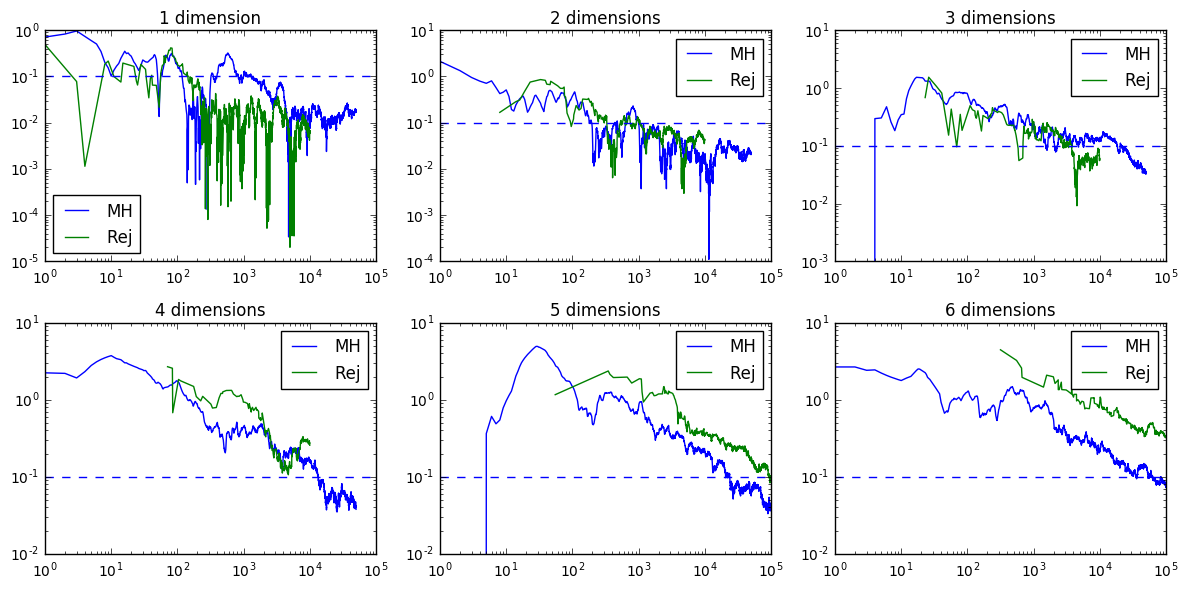

In [40]:
with figure_grid(2,3) as g:
  g.next()
  plt.title('1 dimension')
  plt.plot(*joint_conv_trace([s1], oneG1), label='MH')
  plt.plot(*joint_conv_trace([oneG1.rejection_sample_bounding_box(10000)], oneG1), label='Rej')
  plt.yscale('log')
  plt.xscale('log')
  plt.axhline(0.1, ls='--')
  plt.legend(loc='best')

  g.next()
  plt.title('2 dimensions')
  plt.plot(*joint_conv_trace([s2], oneG2), label='MH')
  plt.plot(*joint_conv_trace([oneG2.rejection_sample_bounding_box(10000)], oneG2), label='Rej')
  plt.yscale('log')
  plt.xscale('log')
  plt.axhline(0.1, ls='--')
  plt.legend(loc='best')

  g.next()
  plt.title('3 dimensions')
  plt.plot(*joint_conv_trace([s3], oneG3), label='MH')
  plt.plot(*joint_conv_trace([oneG3.rejection_sample_bounding_box(10000)], oneG3), label='Rej')
  plt.yscale('log')
  plt.xscale('log')
  plt.axhline(0.1, ls='--')
  plt.legend(loc='best')

  g.next()
  plt.title('4 dimensions')
  plt.plot(*joint_conv_trace([s4], oneG4), label='MH')
  plt.plot(*joint_conv_trace([oneG4.rejection_sample_bounding_box(10000)], oneG4), label='Rej')
  plt.yscale('log')
  plt.xscale('log')
  plt.axhline(0.1, ls='--')
  plt.legend(loc='best')

  g.next()
  plt.title('5 dimensions')
  plt.plot(*joint_conv_trace([s5], oneG5), label='MH')
  plt.plot(*joint_conv_trace([oneG5.rejection_sample_bounding_box(100000)], oneG5), label='Rej')
  plt.yscale('log')
  plt.xscale('log')
  plt.axhline(0.1, ls='--')
  plt.legend(loc='best')

  g.next()
  plt.title('6 dimensions')
  plt.plot(*joint_conv_trace([s6], oneG6), label='MH')
  plt.plot(*joint_conv_trace([oneG6.rejection_sample_bounding_box(100000)], oneG6), label='Rej')
  plt.yscale('log')
  plt.xscale('log')
  plt.axhline(0.1, ls='--')
  plt.legend(loc='best')

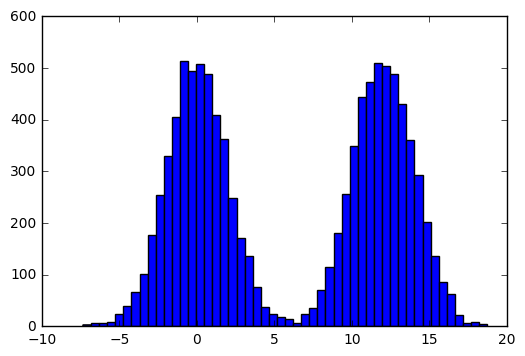

In [77]:
twoG1 = GaussianMixtureGrid(2, 1, 12, 2)
plt.hist(twoG1.sample(10000), bins=50)
plt.show()

In [78]:
twoG1 = GaussianMixtureGrid(2, 1, 12, 2)
tw1 = twoG1.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2))
print(efficiency(tw1[0]))
print(len(twoG1.rejection_sample_bounding_box(10000)[0])/10000.)

twoG2 = GaussianMixtureGrid(2, 2, 12, 2)
tw2 = twoG2.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2))
print(efficiency(tw2[0]))
print(len(twoG2.rejection_sample_bounding_box(10000)[0])/10000.)

twoG3 = GaussianMixtureGrid(2, 3, 12, 2)
tw3 = twoG3.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2))
print(efficiency(tw3[0]))
print(len(twoG3.rejection_sample_bounding_box(10000)[0])/10000.)

twoG4 = GaussianMixtureGrid(2, 4, 12, 2)
tw4 = twoG4.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2))
print(efficiency(tw4[0]))
print(len(twoG4.rejection_sample_bounding_box(10000)[0])/10000.)

twoG5 = GaussianMixtureGrid(2, 5, 12, 2)
tw5 = twoG5.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2))
print(efficiency(tw5[0]))
print(len(twoG5.rejection_sample_bounding_box(10000)[0])/10000.)

twoG6 = GaussianMixtureGrid(2, 6, 12, 2)
tw6 = twoG6.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2))
print(efficiency(tw6[0]))
print(len(twoG6.rejection_sample_bounding_box(10000)[0])/10000.)

[ 0.78848]
0.4203
[ 0.67036  0.67036]
0.177
[ 0.59622  0.59622  0.59622]
0.0738
[ 0.52718  0.52718  0.52718  0.52718]
0.0322
[ 0.4754  0.4754  0.4754  0.4754  0.4754]
0.0137
[ 0.43068  0.43068  0.43068  0.43068  0.43068  0.43068]
0.0046


In [84]:
twoG7 = GaussianMixtureGrid(2, 7, 12, 2)
tw7 = twoG7.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2))
print(efficiency(tw7[0]))
print(len(twoG7.rejection_sample_bounding_box(10000)[0])/10000.)

twoG8 = GaussianMixtureGrid(2, 8, 12, 2)
tw8 = twoG8.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2), rejn=1000)
print(efficiency(tw8[0]))
print(len(twoG8.rejection_sample_bounding_box(10000)[0])/10000.)

twoG9 = GaussianMixtureGrid(2, 9, 12, 2)
tw9 = twoG9.mh_with_teleportation(teleprob=0, proposal_sd=2./np.sqrt(2), rejn=100)
print(efficiency(tw9[0]))
print(len(twoG9.rejection_sample_bounding_box(10000)[0])/10000.)

[ 0.39388  0.39388  0.39388  0.39388  0.39388  0.39388  0.39388]
0.0025
[ 0.35586  0.35586  0.35586  0.35586  0.35586  0.35586  0.35586  0.35586]
0.0009
[ 0.32428  0.32428  0.32428  0.32428  0.32428  0.32428  0.32428  0.32428
  0.32428]
0.0008


In [79]:
tt1 = twoG1.mh_with_teleportation(teleprob=0.4, proposal_sd=2./np.sqrt(2))
tt2 = twoG2.mh_with_teleportation(teleprob=0.2, proposal_sd=2./np.sqrt(2))
tt3 = twoG3.mh_with_teleportation(teleprob=0.1, proposal_sd=2./np.sqrt(2))
tt4 = twoG4.mh_with_teleportation(teleprob=0.05, proposal_sd=2./np.sqrt(2))
tt5 = twoG5.mh_with_teleportation(teleprob=0.025, proposal_sd=2./np.sqrt(2))
tt6 = twoG6.mh_with_teleportation(teleprob=0.0125, proposal_sd=2./np.sqrt(2))

In [114]:
tt7 = twoG7.mh_with_teleportation(teleprob=0.08, proposal_sd=2./np.sqrt(2))

In [113]:
tt8 = twoG8.mh_with_teleportation(teleprob=0.04, proposal_sd=2./np.sqrt(2), rejn=1000)

In [88]:
tt9 = twoG9.mh_with_teleportation(teleprob=0.01, proposal_sd=2./np.sqrt(2), rejn=100)

In [108]:
ts1 = twoG1.rejection_sample_bounding_box(50000)
ts2 = twoG2.rejection_sample_bounding_box(50000)
ts3 = twoG3.rejection_sample_bounding_box(50000)
ts4 = twoG4.rejection_sample_bounding_box(50000)
ts5 = twoG5.rejection_sample_bounding_box(50000)
ts6 = twoG6.rejection_sample_bounding_box(50000)

ts7 = twoG7.rejection_sample_bounding_box(10000)
for i in range(5):
  ex1, ex2 = twoG7.rejection_sample_bounding_box(10000)
  ts7 = (np.concatenate((ts7[0], ex1)), np.concatenate((ts7[1], (i+1)*10000+ex2)))
  

ts9 = twoG9.rejection_sample_bounding_box(10000)
for i in range(10):
  ex1, ex2 = twoG9.rejection_sample_bounding_box(10000)
  ts9 = (np.concatenate((ts9[0], ex1)), np.concatenate((ts9[1], (i+1)*10000+ex2)))

In [112]:
ts8 = twoG8.rejection_sample_bounding_box(10000)
for i in range(10):
  ex1, ex2 = twoG8.rejection_sample_bounding_box(10000)
  ts8 = (np.concatenate((ts8[0], ex1)), np.concatenate((ts8[1], (i+1)*10000+ex2)))

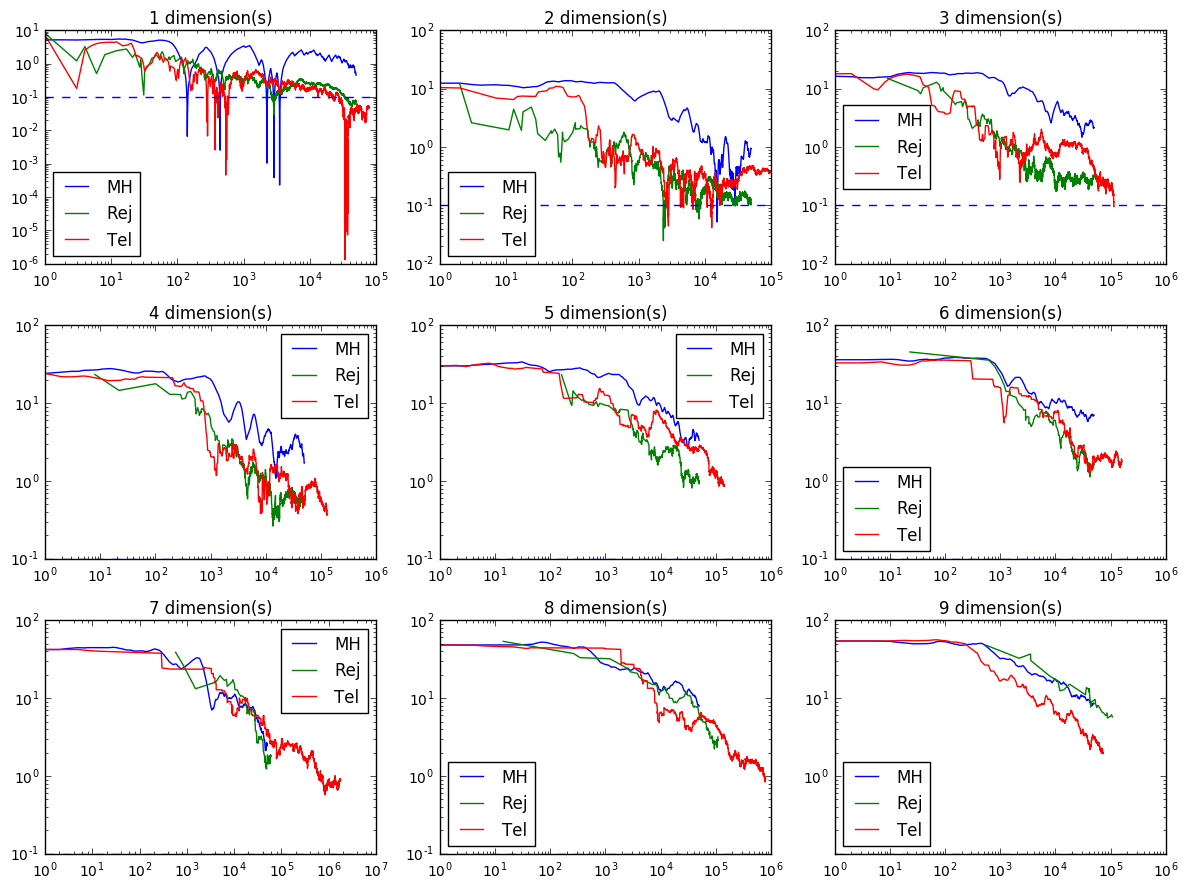

In [115]:
with figure_grid(3,3) as g:
  for i in range(1,10):
    g.next()
    plt.title('{} dimension(s)'.format(i))
    gx = eval('twoG{}'.format(i))
    tw = eval('tw{}'.format(i))
    tt = eval('tt{}'.format(i))
    ts = eval('ts{}'.format(i))
    plt.plot(*joint_conv_trace([tw], gx), label='MH')
    plt.plot(*joint_conv_trace([ts], gx), label='Rej')
    plt.plot(*joint_conv_trace([tt], gx), label='Tel')
    plt.yscale('log')
    plt.xscale('log')
    plt.axhline(0.1, ls='--')
    plt.legend(loc='best')

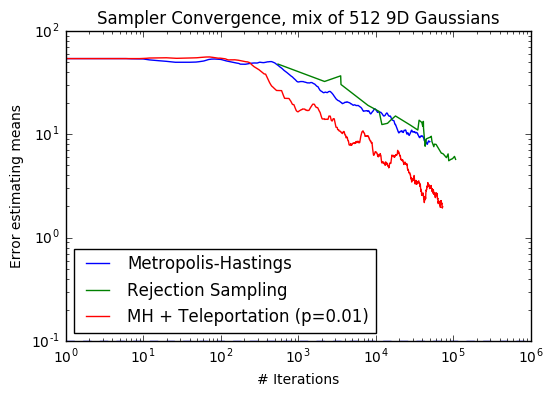

In [133]:
plt.title('Sampler Convergence, mix of 512 9D Gaussians')
plt.plot(*joint_conv_trace([tw9], twoG9), label='Metropolis-Hastings')
plt.plot(*joint_conv_trace([ts9], twoG9), label='Rejection Sampling')
plt.plot(*joint_conv_trace([tt9], twoG9), label='MH + Teleportation (p=0.01)')
plt.yscale('log')
plt.xscale('log')
plt.axhline(0.1, ls='--')
plt.legend(loc='best')
plt.xlabel('# Iterations')
plt.ylabel('Error estimating means')
plt.show()

In [117]:
len(twoG9.means)

512

In [143]:
def rej_nines(n):
  ts9 = twoG9.rejection_sample_bounding_box(5000)
  for i in range(n):
    ex1, ex2 = twoG9.rejection_sample_bounding_box(5000)
    ts9 = (np.concatenate((ts9[0], ex1)), np.concatenate((ts9[1], (i+1)*5000+ex2)))
    if i % 10 == 0:
      print(i)
  return ts9
    
ts9s = [rej_nines(50) for i in range(4)]

0
10
20
30
40
0
10
20
30
40
0
10
20
30
40
0
10
20
30
40


In [134]:
def tt9_inst(n):
  print('.')
  return twoG9.mh_with_teleportation(teleprob=0.01, proposal_sd=2./np.sqrt(2), rejn=100, num_samples=n)
tt9s = [tt9_inst(100000) for i in range(4)]

.
.
.
.


In [135]:
def tw9_inst(n):
  print('.')
  return twoG9.mh_with_teleportation(teleprob=0., proposal_sd=2./np.sqrt(2), num_samples=n)
tw9s = [tw9_inst(100000) for i in range(4)]

.
.
.
.


In [136]:
len(ts9s[:4])

4

In [141]:
tt9s[0]

(array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ..., 
        [  4.60015186,  -2.16736139,  11.77171325, ...,  13.47847736,
           0.44904986,   1.63989411],
        [  6.15581518,  -0.842657  ,  12.64399172, ...,  12.36904862,
           0.97084265,   0.57998761],
        [  6.15581518,  -0.842657  ,  12.64399172, ...,  12.36904862,
           0.97084265,   0.57998761]]),
 array([  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
          1.45515000e+05,   1.45516000e+05,   1.45517000e+05]))

In [150]:
[1,2,3][1:2]

[2]

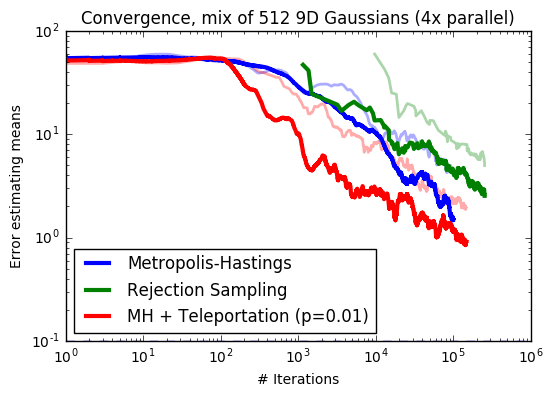

In [154]:
plt.title('Convergence, mix of 512 9D Gaussians (4x parallel)')
plt.plot(*joint_conv_trace(tw9s[1:2], twoG9), color='blue', alpha=0.33, lw=2)
plt.plot(*joint_conv_trace(ts9s[1:2], twoG9), color='green', alpha=0.33, lw=2)
plt.plot(*joint_conv_trace(tt9s[2:3], twoG9), color='red', alpha=0.33, lw=2)

plt.plot(*joint_conv_trace(tw9s[:4], twoG9), label='Metropolis-Hastings', lw=3)
plt.plot(*joint_conv_trace(ts9s[:4], twoG9), label='Rejection Sampling', lw=3)
plt.plot(*joint_conv_trace(tt9s[:4], twoG9), label='MH + Teleportation (p=0.01)', lw=3)
plt.yscale('log')
plt.xscale('log')
plt.axhline(0.1, ls='--')
plt.legend(loc='best')
plt.xlabel('# Iterations')
plt.ylabel('Error estimating means')
plt.show()

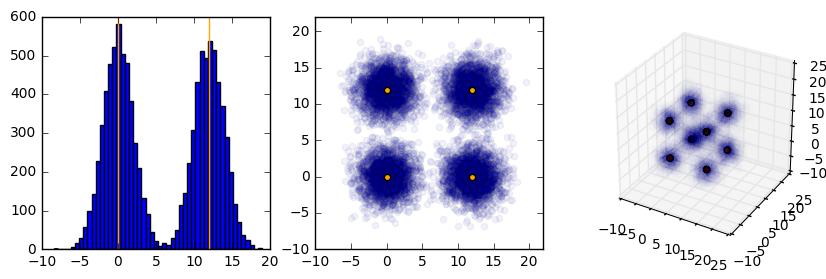

In [168]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.hist(twoG1.sample(10000), bins=50)
for mu in twoG1.means:
  plt.axvline(mu, c='orange')
  
plt.subplot(132)
plt.scatter(*twoG2.sample(10000).T, alpha=0.05)
plt.scatter(*twoG2.means.T, c='orange')
plt.xlim(-10,22)
plt.ylim(-10,22)

X, Y, Z = twoG3.sample(10000).T
Xu, Yu, Zu = twoG3.means.T

plt.subplot(133, projection='3d')
plt.scatter(X, Y, zs=Z, alpha=0.0025)
plt.scatter(Xu, Yu, zs=Zu, c='orange')

plt.show()

In [169]:
import pickle

In [170]:
pickle.dump(tw9s, open('./tw9s.pkl', 'wb'))

In [171]:
pickle.dump(ts9s, open('./ts9s.pkl', 'wb'))

In [172]:
pickle.dump(tt9s, open('./tt9s.pkl', 'wb'))

In [173]:
tt9s2 = [tt9_inst(100000) for i in range(4)]

.
.
.
.


In [174]:
tw9s2 = [tw9_inst(100000) for i in range(4)]

.
.
.
.


In [175]:
ts9s2 = [rej_nines(50) for i in range(4)]

0
10
20
30
40
0
10
20
30
40
0
10
20
30
40
0
10
20
30
40


In [176]:
pickle.dump(tw9s2, open('./tw9s2.pkl', 'wb'))
pickle.dump(ts9s2, open('./ts9s2.pkl', 'wb'))
pickle.dump(tt9s2, open('./tt9s2.pkl', 'wb'))

In [177]:
tt9s3 = [tt9_inst(100000) for i in range(8)]
tw9s3 = [tw9_inst(100000) for i in range(8)]
ts9s3 = [rej_nines(50) for i in range(8)]

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
0
10
20
30
40
0
10
20
30
40
0
10
20
30
40
0
10
20
30
40
0
10
20
30
40
0
10
20
30
40
0
10
20
30
40
0
10
20
30
40


In [178]:
pickle.dump(tw9s3, open('./tw9s3.pkl', 'wb'))
pickle.dump(ts9s3, open('./ts9s3.pkl', 'wb'))
pickle.dump(tt9s3, open('./tt9s3.pkl', 'wb'))

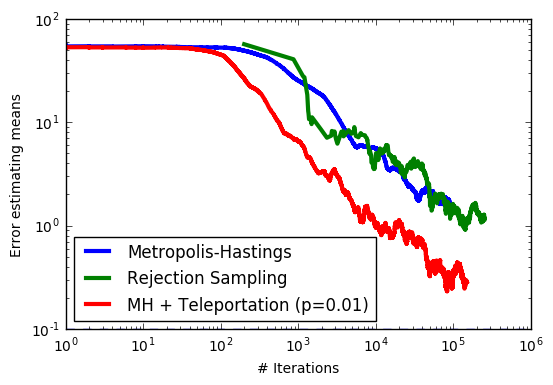

In [180]:
plt.plot(*joint_conv_trace(tw9s+tw9s2+tw9s3, twoG9), label='Metropolis-Hastings', lw=3)
plt.plot(*joint_conv_trace(ts9s+ts9s2+ts9s3, twoG9), label='Rejection Sampling', lw=3)
plt.plot(*joint_conv_trace(tt9s+tt9s2+tt9s3, twoG9), label='MH + Teleportation (p=0.01)', lw=3)

plt.yscale('log')
plt.xscale('log')
plt.axhline(0.1, ls='--')
plt.legend(loc='best')
plt.xlabel('# Iterations')
plt.ylabel('Error estimating means')
plt.show()

In [283]:
from sklearn.linear_model import LinearRegression

def conv_fit(chains, grid, label='', color='red'):
  x,y = joint_conv_trace(chains, grid)
  yy = np.log10(y)
  xx = np.log10(x)
  lreg = LinearRegression()
  lreg.fit(xx.reshape((len(yy),1)), yy)
  print(lreg.coef_)
  print(lreg.intercept_)
  print((-1-lreg.intercept_) / lreg.coef_[0])
  plt.plot(x, y, lw=3, color=color, label=label)
  dom1 = np.linspace(0,8,100)
  dom2 = np.logspace(0,8,100)
  plt.plot(dom2, 10**(lreg.intercept_ + lreg.coef_[0]*dom1), ls='--', color=color)
  plt.yscale('log')
  plt.xscale('log')
  plt.axhline(1., ls='--', color='black')
  plt.ylim(0.9, 100)
  plt.legend(loc='best')
  plt.xlabel('# Iterations')
  plt.ylabel('Error estimating means')

[-0.40501637]
2.07070331185
7.58167697529


/Users/asross/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


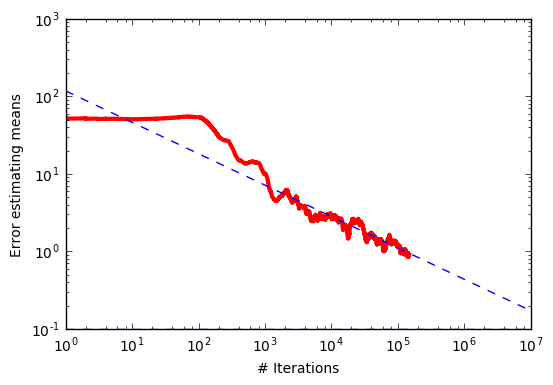

In [257]:
conv_fit(tt9s, twoG9)
plt.show()

[-0.57087499]
2.3795116531
5.91988033375


/Users/asross/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


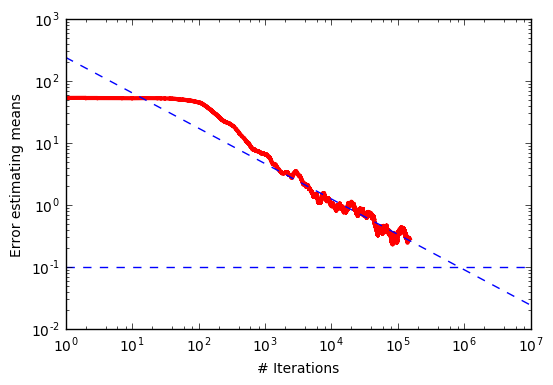

In [258]:
conv_fit(tt9s+tt9s2+tt9s3, twoG9)
plt.show()

[-0.47862863]
3.04622582925
8.45378981612


/Users/asross/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


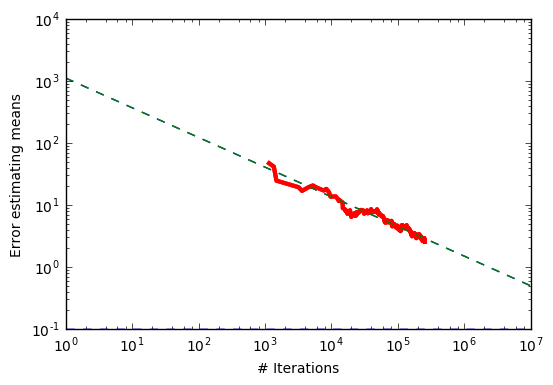

In [260]:
conv_fit(ts9s, twoG9)
plt.show()

[-0.49425336]
2.6876152248
7.46098155459


/Users/asross/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


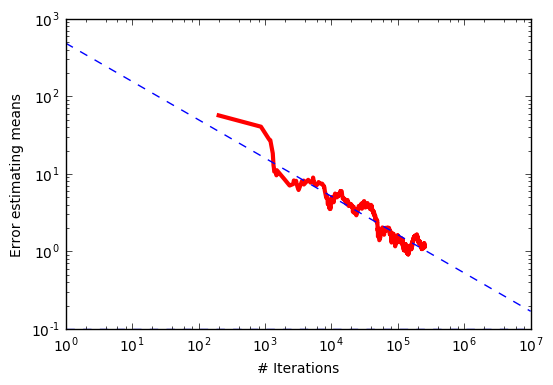

In [261]:
conv_fit(ts9s+ts9s2+ts9s3, twoG9)
plt.show()

[-0.62393048]
3.39957685943
7.05138959424


/Users/asross/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


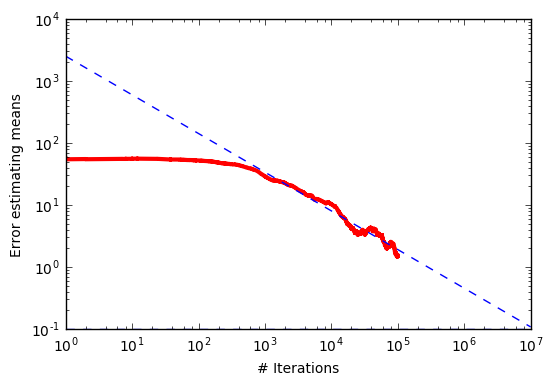

In [262]:
conv_fit(tw9s, twoG9)
plt.show()

[-0.54589613]
2.95756163476
7.24966060901


/Users/asross/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


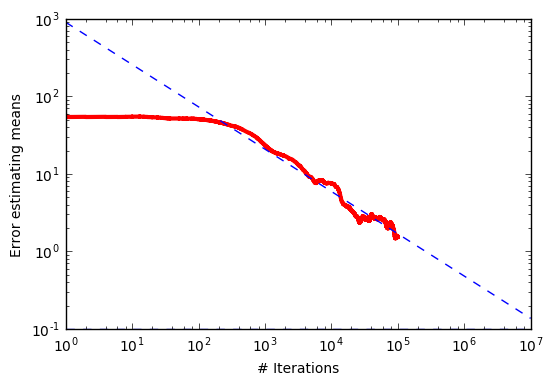

In [263]:
conv_fit(tw9s+tw9s2, twoG9)
plt.show()

[-0.29890481]
2.34346948723
11.1857333408
[-0.45090349]
2.83565985013
8.50660940135
[-0.64297092]
3.48779355113
6.97977686431
[-0.55316714]
2.99119552362
7.2151710485
[-0.55725028]
2.93052563879
7.05342963886


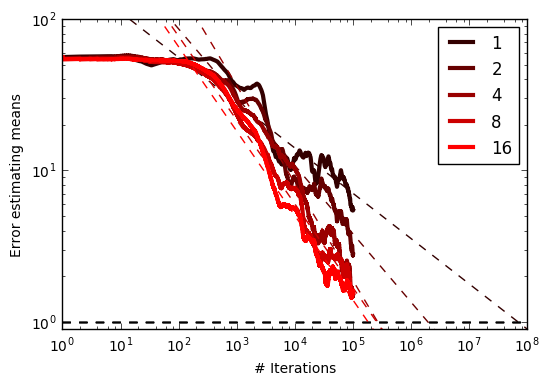

In [280]:
conv_fit(tw9s[:1], twoG9, label='1', color=(0.2,0,0))
conv_fit(tw9s[:2], twoG9, label='2', color=(0.4,0,0))
conv_fit(tw9s, twoG9, label='4', color=(0.6,0,0))
conv_fit(tw9s+tw9s2, twoG9, label='8', color=(0.8,0,0))
conv_fit(tw9s+tw9s2+tw9s3, twoG9, label='16', color=(1,0,0))
plt.legend(loc='best')
plt.show()

[-0.31509596]
1.9154063073
9.25243955523
[-0.36226357]
1.9525395997
8.15025268483
[-0.39326911]
2.01429240318
7.66470670915
[-0.60054337]
2.67164753616
6.11387574244
[-0.56950302]
2.37292217739
5.92257123533


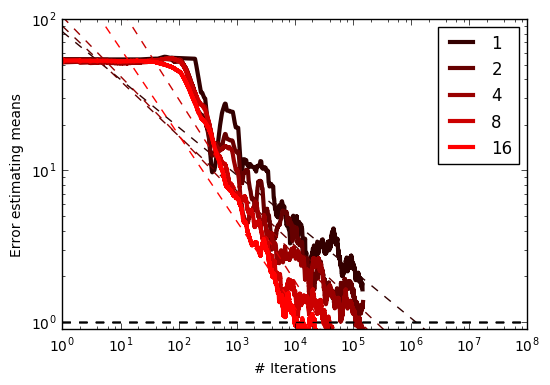

In [281]:
conv_fit(tt9s[:1], twoG9, label='1', color=(0.2,0,0))
conv_fit(tt9s[:2], twoG9, label='2', color=(0.4,0,0))
conv_fit(tt9s, twoG9, label='4', color=(0.6,0,0))
conv_fit(tt9s+tt9s2, twoG9, label='8', color=(0.8,0,0))
conv_fit(tt9s+tt9s2+tt9s3, twoG9, label='16', color=(1,0,0))
plt.legend(loc='best')
plt.show()

[-0.55110694]
3.54714501708
8.25093049534
[-0.44885923]
3.02710588482
8.97186836755
[-0.47862863]
3.04622582925
8.45378981612
[-0.47243562]
2.77353462327
7.98740499766
[-0.49425336]
2.6876152248
7.46098155459


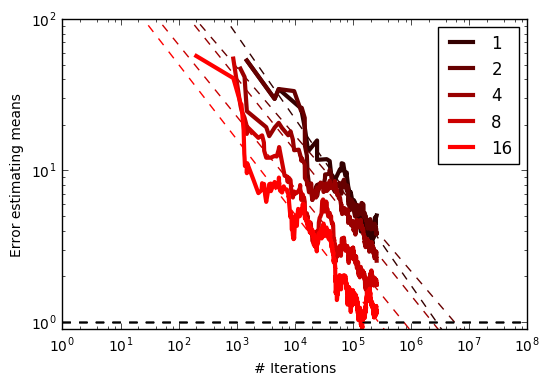

In [284]:
conv_fit(ts9s[:1], twoG9, label='1', color=(0.2,0,0))
conv_fit(ts9s[:2], twoG9, label='2', color=(0.4,0,0))
conv_fit(ts9s, twoG9, label='4', color=(0.6,0,0))
conv_fit(ts9s+ts9s2, twoG9, label='8', color=(0.8,0,0))
conv_fit(ts9s+ts9s2+ts9s3, twoG9, label='16', color=(1,0,0))
plt.legend(loc='best')
plt.show()

In [303]:
def conv_lin(index, errors, burnin=100):
  start = np.argwhere(index > burnin)[0][0]
  lg_ery = np.log10(errors[start:])
  lg_idx = np.log10(index[start:]).reshape((len(lg_ery), 1))
  lreg = LinearRegression()
  lreg.fit(lg_idx, lg_ery)
  score = lreg.score(lg_idx, lg_ery)
  return lreg.coef_[0], lreg.intercept_, score

In [301]:
ts9_full = ts9s + ts9s2 + ts9s3

In [307]:
conv0s = [joint_conv_trace([ts9], twoG9) for ts9 in ts9_full]

In [313]:
np.mean([conv_lin(*conv0)[1] for conv0 in conv0s])

3.344346905250962

In [328]:
import itertools

In [329]:
conv0s2 = [joint_conv_trace(comb, twoG9) for comb in itertools.combinations(ts9_full, 2)]

In [335]:
conv0s3 = [joint_conv_trace(comb, twoG9) for comb in itertools.combinations(ts9_full, 4)]

In [344]:
conv0s4 = [joint_conv_trace(comb, twoG9) for i,comb in enumerate(itertools.combinations(ts9_full, 8)) if i%64==0]

In [340]:
conv0s5 = [joint_conv_trace(comb, twoG9) for comb in itertools.combinations(ts9_full, 16)]

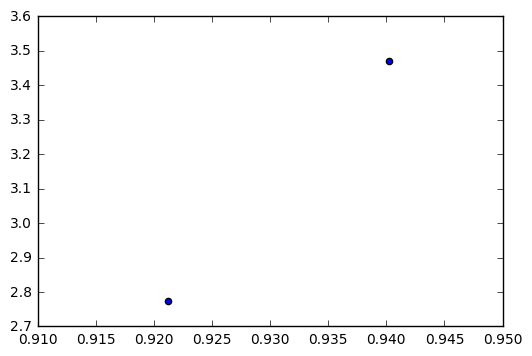

In [327]:
plt.scatter([conv_lin(*conv0)[2] for conv0 in conv0s4], [conv_lin(*conv0)[1] for conv0 in conv0s4])
plt.show()

In [346]:
intercepts=[
  10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s]),
  10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s2]),
  10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s3]),
  10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s4]),
  10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s5])
]
ps = [1,2,4,8,16]

In [350]:
speedups = [intercepts[0]/intercepts[i] for i in range(len(intercepts))]

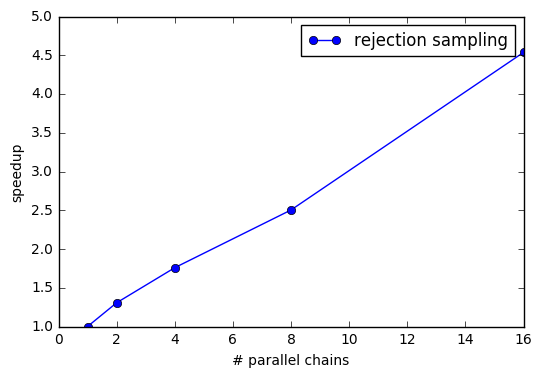

In [356]:
plt.plot(ps, speedups, marker='o', label='rejection sampling')
#plt.xscale('log', basex=2)
plt.ylabel('speedup')
plt.xlabel('# parallel chains')
plt.legend(loc='best')
plt.show()

In [330]:
10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s2])

1691.9334051409867

In [336]:
10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s3])

1256.4895687564976

In [345]:
10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s4])

882.72059289269328

In [343]:
10**np.mean([conv_lin(*conv0)[1] for conv0 in conv0s5])

487.09674204803338

In [295]:
idx, conv = joint_conv_trace(ts9s, twoG9)

In [299]:
conv_fit(idx, conv)[1]

3.0462258292515014

In [358]:
ts9_full = ts9s + ts9s2 + ts9s3
tt9_full = tt9s + tt9s2 + tt9s3
tw9_full = tw9s + tw9s2 + tw9s3


In [360]:
pickle.dump(ts9_full, open('./9d-rejection-16x.pkl', 'wb'))

In [361]:
pickle.dump(tt9_full, open('./9d-teleport-16x.pkl', 'wb'))

In [362]:
pickle.dump(tw9_full, open('./9d-metropolis-16x.pkl', 'wb'))

In [363]:
pickle.dump(twoG9, open('./9d-grid.pkl', 'wb'))